In [113]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd

features = []

with open("UCI HAR Dataset/features.txt") as f:
    features =[line.split()[1] for line in f.readlines()]

print("Number of features: {}".format(len(features)))

Number of features: 561


In [22]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [64]:
X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
X_train.columns = features
X_train['subject'] = pd.read_csv('UCI HAR dataset/train/subject_train.txt', header=None, squeeze=True)


y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, names=['Activity'], squeeze=True)

y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

X_train['Activity'] = y_train
X_train['Activity Name'] = y_train_labels

In [65]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [61]:
print(X_train.shape, y_train.shape)

(7352, 564) (7352,)


In [62]:
X_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
X_test.columns = features
X_test['subject'] = pd.read_csv('UCI HAR dataset/test/subject_test.txt', header=None, squeeze=True)

y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, names=['Activity'], squeeze=True)

y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

X_test['Activity'] = y_test
X_test['Activity Name'] = y_test_labels

In [50]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Activity Name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5,STANDING


## Data Cleaning

In [53]:
print("Number of duplicates in train: {}".format(sum(X_train.duplicated())))
print("Number of duplicates in test: {}".format(sum(X_test.duplicated())))

Number of duplicates in train: 0
Number of duplicates in test: 0


In [56]:
print("Number of duplicates in train: {}".format((X_train.isnull().values.sum())))
print("Number of duplicates in test: {}".format((X_test.isnull().values.sum())))

Number of duplicates in train: 0
Number of duplicates in test: 0


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

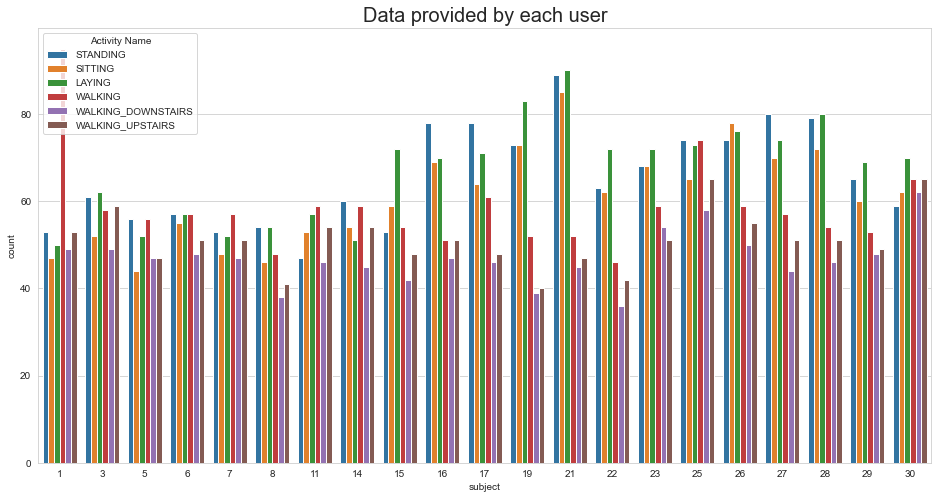

In [66]:
plt.figure(figsize=(16, 8))
plt.title("Data provided by each user", fontsize=20)
sns.countplot(x='subject', hue='Activity Name', data=X_train)
plt.show()

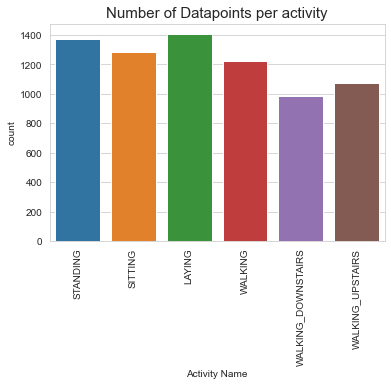

In [68]:
plt.title("Number of Datapoints per activity", fontsize=15)
sns.countplot(x = X_train['Activity Name'])
plt.xticks(rotation=90)
plt.show()

In [82]:
# Changing Feature Names

columns = X_train.columns

columns = columns.str.replace('[()]', '',regex=True)
columns = columns.str.replace('[-]', '',regex=True)
columns = columns.str.replace('[,]', '',regex=True)

X_train.columns = columns
X_test.columns = columns

X_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,Activity Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [76]:
X_train.to_csv("UCI HAR Dataset/csv_files/train.csv", index=False)
X_test.to_csv("UCI HAR Dataset/csv_files/test.csv", index=False)

### EDA

# Comparing Static and Dynamic features


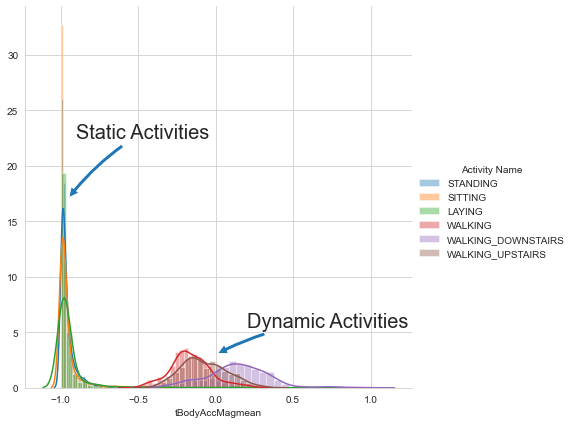

In [114]:

facetgrid = sns.FacetGrid(X_train, hue='Activity Name', height=6)
facetgrid.map(sns.distplot, "tBodyAccMagmean").add_legend()
plt.annotate("Static Activities", xy=(-0.956, 17), xytext=(-0.9, 23), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple", connectionstyle="arc3, rad=0.1"))
plt.annotate("Dynamic Activities", xy=(0, 3), xytext=(0.2, 6), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple", connectionstyle="arc3, rad=0.1"))
plt.show()

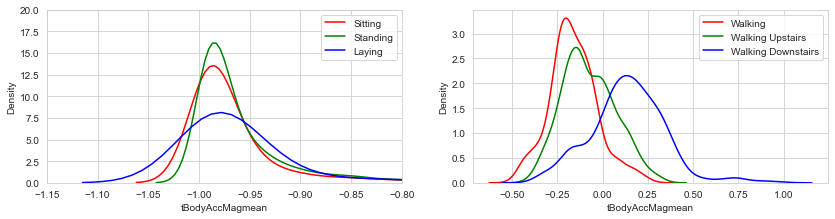

In [142]:
plt.figure(figsize=(14, 7))
plt.subplot(2,2,1)
sns.distplot(X_train[X_train['Activity']==4]['tBodyAccMagmean'], label='Sitting', color='r', hist=False)
sns.distplot(X_train[X_train['Activity']==5]['tBodyAccMagmean'], label='Standing', color='g', hist=False)
sns.distplot(X_train[X_train['Activity']==6]['tBodyAccMagmean'], label='Laying', color='b', hist=False)
plt.axis([-1.15, -0.8, 0, 20])
plt.legend(loc='upper right')

plt.subplot(2,2,2)
sns.distplot(X_train[X_train['Activity']==1]['tBodyAccMagmean'], label='Walking', color='r', hist=False)
sns.distplot(X_train[X_train['Activity']==2]['tBodyAccMagmean'], label='Walking Upstairs', color='g', hist=False)
sns.distplot(X_train[X_train['Activity']==3]['tBodyAccMagmean'], label='Walking Downstairs', color='b', hist=False)
# plt.axis([-1.15, -0.8, 0, 20])
plt.legend(loc='upper right')

plt.show()

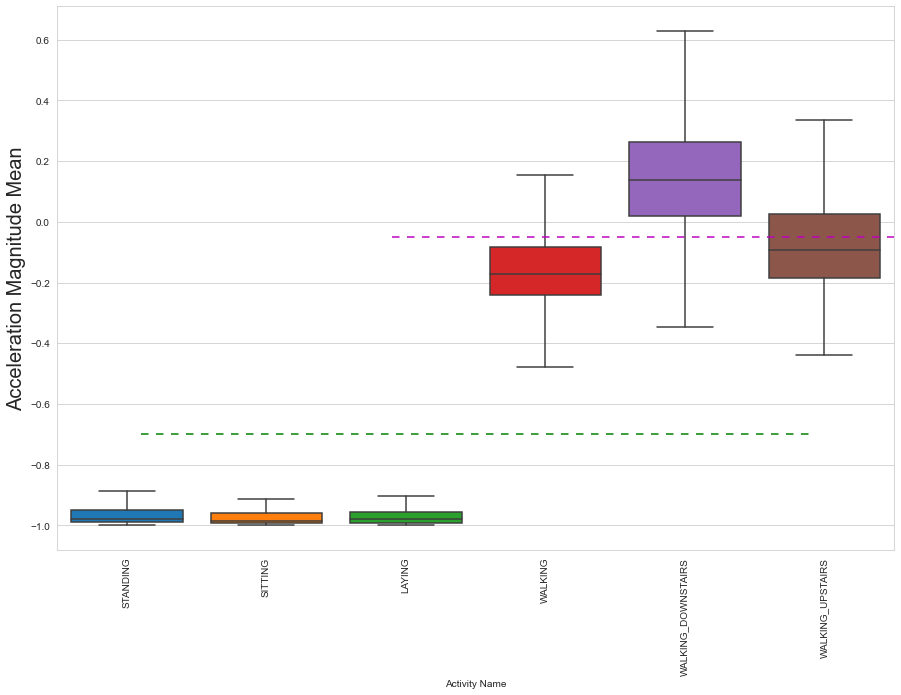

In [166]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Activity Name', y='tBodyAccMagmean', data=X_train, showfliers=False, saturation=1)
plt.ylabel("Acceleration Magnitude Mean", size=20)
plt.axhline(y = -0.7, xmin=0.1, xmax=0.9, dashes=(5,5), c='g')
plt.axhline(y = -0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()